In [2]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data
                                                   ,boston.target
                                                   ,test_size=0.2
                                                   ,random_state=0)

In [7]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [8]:
print "MAE", mean_absolute_error(y_test, y_pred)

MAE 3.84281058945


In [9]:
%timeit regr.fit(X_train, y_train)

1000 loops, best of 3: 325 µs per loop


In [13]:
# switch to logistic regression based on threshold
avg_price = np.average(boston.target)
avg_price

22.532806324110677

In [14]:
high_price_idx = (y_train >= avg_price)
y_train[high_price_idx] = 1
y_train[np.logical_not(high_price_idx)] = 0
y_train = y_train.astype(np.int8)

In [15]:
high_price_idx = (y_test >= avg_price)
y_test[high_price_idx] = 1
y_test[np.logical_not(high_price_idx)] = 0
y_test = y_test.astype(np.int8)

In [16]:
# train and apply classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.81      0.92      0.86        61
          1       0.85      0.68      0.76        41

avg / total       0.83      0.82      0.82       102



In [17]:
%timeit clf.fit(X_train, y_train)

100 loops, best of 3: 2.29 ms per loop


## Naive Bayes

In [19]:
# applied using a Gaussian Naive Bayes classifer
from sklearn import datasets
iris = datasets.load_iris()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris.data
                                                   ,iris.target
                                                   ,test_size=0.2
                                                   ,random_state=0)

In [21]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.93      1.00      0.96        13
          2       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



## K-Nearest Neighbors

In [24]:
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [25]:
mnist = fetch_mldata("MNIST original")
mnist.data, mnist.target = shuffle(mnist.data, mnist.target)

In [26]:
# reduce size of data set
mnist.data = mnist.data[:1000]
mnist.target = mnist.target[:1000]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data
                                                   ,mnist.target
                                                   ,test_size=0.8
                                                   ,random_state=0)

In [29]:
# KNN set to K = 10
clf = KNeighborsClassifier(3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [30]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88        77
        1.0       0.56      0.99      0.72        89
        2.0       0.89      0.69      0.78        83
        3.0       0.73      0.76      0.75        68
        4.0       0.82      0.42      0.56        76
        5.0       0.78      0.70      0.74        73
        6.0       0.87      0.94      0.90        79
        7.0       0.82      0.74      0.78        88
        8.0       0.89      0.55      0.68        85
        9.0       0.65      0.80      0.72        82

avg / total       0.78      0.75      0.75       800



In [31]:
%timeit clf.fit(X_train, y_train)

1000 loops, best of 3: 1.74 ms per loop


In [32]:
# the prediction speed is connected to the number of samples you have in your training step and the number 
# of features composing it ;  not good for big data at all
%timeit clf.predict(X_test)

10 loops, best of 3: 152 ms per loop


## Support Vector Machines

In [33]:
# note these run much faster in numpy array form
import urllib2

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/ijcnn1.bz2'
with open('ijcnn1.bz2', 'wb') as W:
    W.write(urllib2.urlopen(target_page).read())
    
from sklearn.datasets import load_svmlight_file
X_train, y_train = load_svmlight_file('ijcnn1.bz2')
first_rows = 2500
X_train, y_train = X_train[:first_rows, :], y_train[:first_rows]

In [34]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score

hyopthesis  = SVC(kernel='rbf', degree=2, random_state=101)
scores = cross_val_score(hyopthesis, X_train, y_train, cv=5, scoring='accuracy')

In [35]:
print "SVC with Radial Basis Function, accuracy : mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

SVC with Radial Basis Function, accuracy : mean = 0.910 std = 0.001


## SVM for Regression

In [36]:
import urllib2

target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/cadata'
from sklearn.datasets import load_svmlight_file

In [37]:
X_train, y_train = load_svmlight_file(urllib2.urlopen(target_page))

In [38]:
from sklearn.preprocessing import scale

# scale all data before using SVM
first_rows = 2000
X_train = scale(X_train[:first_rows, :].toarray())
y_train = y_train[:first_rows] / 1000

In [39]:
from sklearn.svm import SVR

hypothesis = SVR()
scores = cross_val_score(hypothesis, X_train, y_train, cv=3, scoring='mean_absolute_error')

In [40]:
print "SVR -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

SVR -> cross validation accuracy: mean = -57.838 std = 7.145


In [4]:
from sklearn.datasets import load_svmlight_file
from sklearn.svm import SVC
from sklearn.grid_search import RandomizedSearchCV

In [5]:
X_train, y_train = load_svmlight_file('ijcnn1.bz2') # loads from sparse CSR Matrix
first_rows = 2500
X_train, y_train = X_train[:first_rows, :], y_train[:first_rows]

hypothesis = SVC(kernel='rbf', random_state=101)

In [6]:
search_dict = {'degree': [2,3], 'C' :[0.01, 0.1, 1, 10, 100, 1000], 'gamma' : [0.1, 0.01, 0.001, 0.0001]}

In [7]:
search_func = RandomizedSearchCV(estimator = hypothesis
                                ,param_distributions=search_dict
                                ,n_iter=30
                                ,scoring = 'accuracy'
                                ,iid=True
                                ,refit = True
                                ,cv = 5
                                ,random_state=101)

In [8]:
search_func.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'degree': [2, 3]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          scoring='accuracy', verbose=0)

In [9]:
print "Best params %s" % search_func.best_params_
print "CV accuracy : mean = %0.3f" % search_func.best_score_

Best params {'C': 100, 'gamma': 0.1, 'degree': 3}
CV accuracy : mean = 0.998


## Ensemble Strategies

In [10]:
from sklearn.datasets import fetch_covtype

In [12]:
covertype_dataset = fetch_covtype(random_state=101, shuffle=True)
#print covertype_dataset.DESCR
covertype_X = covertype_dataset.data[:15000,:]
covertype_y = covertype_dataset.target[:15000]

In [13]:
del covertype_dataset

In [14]:
covertypes = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [15]:
# bagging with week ensembles
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_covtype
import numpy as np

In [16]:
hypothesis = BaggingClassifier(KNeighborsClassifier(n_neighbors=1)
                              ,max_samples=0.7
                              ,max_features=0.7
                              ,n_estimators=100)

In [17]:
scores = cross_val_score(hypothesis
                        ,covertype_X
                        ,covertype_y
                        ,cv=3
                        ,scoring = 'accuracy')

In [18]:
print "Bagging Classifier CV : mean = %0.3f , std = %0.3f" % (np.mean(scores), np.std(scores))

Bagging Classifier CV : mean = 0.795 , std = 0.003


In [19]:
# random subspaces = Random Forest
from sklearn.ensemble import RandomForestClassifier

In [20]:
hypothesis = RandomForestClassifier(n_estimators=100, random_state=101)

In [21]:
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy')

In [23]:
print "Randomd Forest CV  accuracy : mean = %0.3f, std = %0.3f" %(np.mean(scores), np.std(scores))

Randomd Forest CV  accuracy : mean = 0.808, std = 0.008


In [26]:
# using a more randoimzed RF with lower variance but greater bias
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
hypothesis = ExtraTreesClassifier(n_estimators=100, random_state=101)

In [28]:
scores = cross_val_score(hypothesis
                        ,covertype_X
                        ,covertype_y
                        ,cv = 3
                        ,scoring = 'accuracy')

In [29]:
print "ExtraTreesClassifier -> cross validation accuracy: mean = %0.3f std = %0.3f" % (np.mean(scores), np.std(scores))

ExtraTreesClassifier -> cross validation accuracy: mean = 0.821 std = 0.007


Retry random forest with 300 trees

In [32]:
hypothesis = RandomForestClassifier(n_estimators=300, random_state=101)

scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=5, scoring='accuracy')

print "Randomd Forest CV  accuracy : mean = %0.3f, std = %0.3f" %(np.mean(scores), np.std(scores))

Randomd Forest CV  accuracy : mean = 0.825, std = 0.002


### AdaBoost

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [34]:
hypothesis = AdaBoostClassifier(n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, covertype_X, covertype_y, cv=3, scoring='accuracy')

print "AdaBoost CV accuracy : mean = %0.3f, std = %0.3f" %(np.mean(scores), np.std(scores))

AdaBoost CV accuracy : mean = 0.610, std = 0.014


## Gradient Boosting GTB

In [35]:
import urllib2
target_page = 'http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/poker.bz2'

with open('poker.bz2','wb') as W:
    W.write(urllib2.urlopen(target_page).read())

In [37]:
from sklearn.datasets import load_svmlight_file

X_train, y_train = load_svmlight_file('poker.bz2')

In [38]:
from sklearn.preprocessing import OneHotEncoder
hot_encoding = OneHotEncoder(sparse=True)

In [39]:
X_train = hot_encoding.fit_transform(X_train.toarray()).toarray()[:2500,:]
y_train = y_train[:2500]

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

In [41]:
hypothesis = GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=101)
scores = cross_val_score(hypothesis, X_train, y_train, cv=5, scoring='accuracy')
print "GB CV accuracy : mean = %0.3f, std = %0.3f" %(np.mean(scores), np.std(scores))

GB CV accuracy : mean = 0.867, std = 0.008


C:\Users\Home\Anaconda\lib\site-packages\sklearn\cross_validation.py:413: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


## Dealing with Big Data

In [17]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [18]:
newsgroups_data = fetch_20newsgroups(shuffle=True, remove=('headers','footers','qoutes'), random_state=6)

In [19]:
print 'Posts inside the data : %s' %  np.shape(newsgroups_data.data)

Posts inside the data : 11314


In [5]:
print 'Average # of words for posts : %0.0f' % np.mean([len(text.split(' ')) for text in newsgroups_data.data])

Average # of words for posts : 267


In [7]:
# make syntehcitc data to how how SK scales
from sklearn.datasets import make_classification

In [8]:
X,y = make_classification(n_samples=10**5, n_features=5, n_informative=3, random_state=101) # 10 million cases
D = np.c_[y,X]
np.savetxt('huge_dataset_10__5.csv', D, delimiter=",") 

In [9]:
X,y = make_classification(n_samples=10**6, n_features=5, n_informative=3, random_state=101) # 10 million cases
D = np.c_[y,X]
np.savetxt('huge_dataset_10__6.csv', D, delimiter=",") 

In [10]:
X,y = make_classification(n_samples=10**7, n_features=5, n_informative=3, random_state=101) # 10 million cases
D = np.c_[y,X]
np.savetxt('huge_dataset_10__7.csv', D, delimiter=",") 

del (D, X, y)

In [11]:
#The trickto manage high volumes of data without loading too many megabytes or 
#gigabytes into memory is to incrementally update the parameters of your algorithm 
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [12]:
streaming = pd.read_csv("huge_dataset_10__7.csv", header=None, chunksize=10000)

In [13]:
learner = SGDClassifier(loss='log')
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
cumulative_accuracy = list()

In [14]:
# pands read csv 10,000  bataches from the file 
# minmax scale records ordre range of each variable on frist batch
# from 9th bathc on record the accuracy of the learning algorithim
for n,chunk in enumerate(streaming):
    if n == 0:
        minmax_scaler.fit(chunk.ix[:,1:].values)
    X = minmax_scaler.transform(chunk.ix[:,1:].values)
    X[X>1] = 1
    X[X<0] = 0
    y = chunk.ix[:,0]
    if n > 8 :
        cumulative_accuracy.append(learner.score(X,y))
    learner.partial_fit(X,y,classes=np.unique(y))

In [15]:
# average for global performance
print 'Progressive validation mean accuracy %0.3f' % np.mean(cumulative_accuracy)

Progressive validation mean accuracy 0.660


In [62]:
import os

In [63]:
os.remove('huge_dataset_10__5.csv')
os.remove('huge_dataset_10__6.csv')
os.remove('huge_dataset_10__7.csv')

## Dealing with Variety

In [35]:
# use hashes in sparse matrixes to handle highly dimensional data
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer

In [48]:
def streaming():
    for response, item in zip(newsgroups_data.target, newsgroups_data.data):
        yield response, item

In [49]:
hashing_trick = HashingVectorizer(stop_words='english', norm = 'l2', non_negative=True)

In [50]:
learner = SGDClassifier(random_state=101)
texts = list()
targets = list()

In [51]:
for n,(target, text) in enumerate(streaming()):
    texts.append(text)
    targets.append(target)
    if n % 1000 == 0 and n >0:
        learning_chunk = hashing_trick.transform(texts)
        if n > 1000:
            last_validation_score = learner.score(learning_chunk, targets),learner.partial_fit(learning_chunk, targets, classes=[k for k in range(20)])
            texts, targets = list(), list()
            
print 'Last validation score: %0.3f' % last_validation_score

AttributeError: 'NoneType' object has no attribute 'shape'

## Natrual Language Processing

In [30]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

In [15]:
# tokenize words
my_text = "The coolest job in the next 10 years will be statisticians. People think I'm joking, but who would've guessed that computer engineers would've been the coolest job of the 1990s?"

In [16]:
simple_toks = my_text.split(' ')

In [17]:
print simple_toks

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians.', 'People', 'think', "I'm", 'joking,', 'but', 'who', "would've", 'guessed', 'that', 'computer', 'engineers', "would've", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s?']


In [18]:
import nltk

In [19]:
nltk_tokens = nltk.word_tokenize(my_text)
print nltk_tokens

['The', 'coolest', 'job', 'in', 'the', 'next', '10', 'years', 'will', 'be', 'statisticians', '.', 'People', 'think', 'I', "'m", 'joking', ',', 'but', 'who', 'would', "'ve", 'guessed', 'that', 'computer', 'engineers', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s', '?']


In [20]:
# stem words
from nltk.stem import *

stemmer = LancasterStemmer()

print [stemmer.stem(word) for word in nltk_tokens]

['the', 'coolest', 'job', 'in', 'the', 'next', '10', 'year', 'wil', 'be', 'stat', '.', 'peopl', 'think', 'i', "'m", 'jok', ',', 'but', 'who', 'would', "'ve", 'guess', 'that', 'comput', 'engin', 'would', "'ve", 'been', 'the', 'coolest', 'job', 'of', 'the', '1990s', '?']


In [24]:
# word tagging - association between word and part of speech - show word part of speech
print nltk.pos_tag(nltk_tokens)

[('The', 'DT'), ('coolest', 'JJS'), ('job', 'NN'), ('in', 'IN'), ('the', 'DT'), ('next', 'JJ'), ('10', 'CD'), ('years', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('statisticians', 'NNS'), ('.', '.'), ('People', 'NNS'), ('think', 'VBP'), ('I', 'PRP'), ("'m", 'VBP'), ('joking', 'VBG'), (',', ','), ('but', 'CC'), ('who', 'WP'), ('would', 'MD'), ("'ve", 'VBP'), ('guessed', 'VBN'), ('that', 'IN'), ('computer', 'NN'), ('engineers', 'NNS'), ('would', 'MD'), ("'ve", 'VBP'), ('been', 'VBN'), ('the', 'DT'), ('coolest', 'JJS'), ('job', 'NN'), ('of', 'IN'), ('the', 'DT'), ('1990s', 'CD'), ('?', '.')]


In [28]:
# Named entity recognition - find tokenz associted with people, orgs and locations
text = "Elvis Aaron Presley was an American singer and actor. Born in Tupelo, Mississippi, when Presley was 13 years old he and his family relocated to Memphis, Tennessee."

In [31]:
chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))

In [32]:
print chunks

(S
  (PERSON Elvis/NNP)
  (PERSON Aaron/NNP Presley/NNP)
  was/VBD
  an/DT
  (GPE American/JJ)
  singer/NN
  and/CC
  actor/NN
  ./.
  Born/VBN
  in/IN
  (GPE Tupelo/NNP)
  ,/,
  (GPE Mississippi/NNP)
  ,/,
  when/WRB
  (PERSON Presley/NNP)
  was/VBD
  13/CD
  years/NNS
  old/JJ
  he/PRP
  and/CC
  his/PRP$
  family/NN
  relocated/VBD
  to/TO
  (GPE Memphis/NNP)
  ,/,
  (GPE Tennessee/NNP)
  ./.)


In [34]:
# taking out stopwords
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
print stop_words

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'four', 'not', 'own', 'through', 'yourselves', 'fify', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'go', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'neit

## Complete Text Classifcation Example

In [7]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import nltk

In [2]:
categories = ['sci.med', 'sci.space']
to_remove = ('headers', 'footers', 'qoutes')

twenty_sci_news_train = fetch_20newsgroups(subset='train', remove=to_remove, categories=categories)
twenty_sci_news_test = fetch_20newsgroups(subset='test', remove=to_remove, categories=categories)

In [57]:
# using TfIdf to weight freqs
tf_vect = TfidfVectorizer(ngram_range=(1,2)) # allow 2 word combos
X_train = tf_vect.fit_transform(twenty_sci_news_train.data)
X_test = tf_vect.transform(twenty_sci_news_test.data)
y_train = twenty_sci_news_train.target
y_test = twenty_sci_news_test.target

In [58]:
clf = SGDClassifier(penalty= 'elasticnet', loss='log', n_iter = 15) # swap pentaly from l2 to elastic and hinge to log ; mke iterations 15
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print "Accuracy = ", accuracy_score(y_test, y_pred)

Accuracy =  0.939240506329


In [59]:
# use stopword remove, tokenzation, and stemming to gain accuracy
def clean_and_stem(text):
    tokens = nltk.word_tokenize(text.lower())
    clean_tokens = [word for word in tokens if word not in stop_words]
    stem_tokens = [stemmer.stem(token) for token in clean_tokens]
    return " ".join(stem_tokens)

In [60]:
clean_docs_train = [clean_and_stem(text) for text in twenty_sci_news_train.data]
clean_docs_test = [clean_and_stem(text) for text in twenty_sci_news_test.data]

In [61]:
X1_train = tf_vect.fit_transform(clean_docs_train)
X1_test = tf_vect.transform(clean_docs_test)
clf.fit(X1_train, y_train)
y1_pred = clf.predict(X1_test)

print "Accuracy = ", accuracy_score(y_test, y1_pred)

Accuracy =  0.959493670886


## Unsupervised Learning

In [64]:
%matplotlib inline

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [66]:
N_samples = 2000

In [68]:
dataset_1 = np.array(datasets.make_circles(n_samples=N_samples, noise=0.05, factor=0.3)[0])

In [69]:
dataset_2 = np.array(datasets.make_blobs(n_samples=N_samples, centers=4, cluster_std=0.4, random_state=0)[0])

C:\Users\Home\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


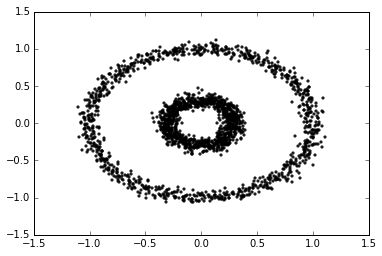

In [70]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c='k',  alpha=0.8, s=5.0)

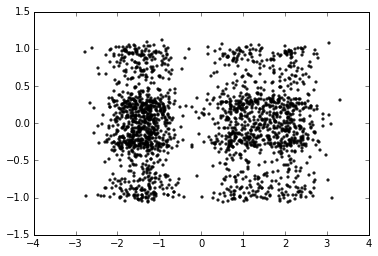

In [71]:
plt.scatter(dataset_2[:,0], dataset_1[:,1], c="k", alpha=0.8, s=5.0)

In [72]:
# apply k means with k = 2
from sklearn.cluster import KMeans

In [73]:
K_dat = 2
km_1 = KMeans(n_clusters=K_dat)
lab1 = km_1.fit(dataset_1).labels_

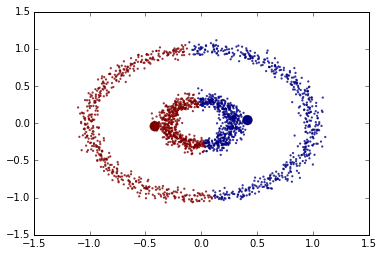

In [78]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=lab1,  alpha=0.8, s=5.0, lw=0)
plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=100, c=np.unique(lab1), lw=0.2)

In [79]:
# swtich to speherical data set intead
K_dat = 4
km_2 = KMeans(n_clusters=K_dat)
lab2 = km_2.fit(dataset_2).labels_

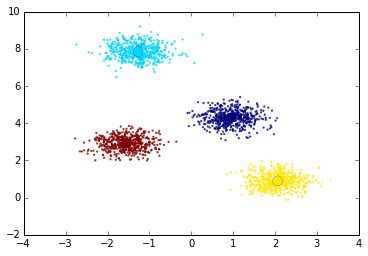

In [83]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=lab2, alpha=0.8, s=5.0, lw = 0)
plt.scatter(km_2.cluster_centers_[:,0], km_2.cluster_centers_[:,1], s=100, c=np.unique(lab2), lw=0.2)

## Use DBSCAN on the Spherical Cluster

In [84]:
from sklearn.cluster import DBSCAN

In [85]:
dbs_1 = DBSCAN(eps=0.25)
lab1 = dbs_1.fit(dataset_1).labels_

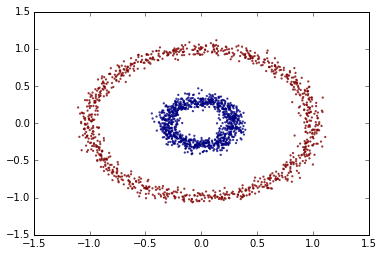

In [86]:
plt.scatter(dataset_1[:,0], dataset_1[:,1], c=lab1, alpha=0.8, s=5.0, lw = 0)

In [87]:
np.unique(lab1)

array([0, 1])

In [88]:
# using DBSCAN on the other data set
dbs_2 = DBSCAN(eps=0.5)
lab2 = dbs_2.fit(dataset_2).labels_

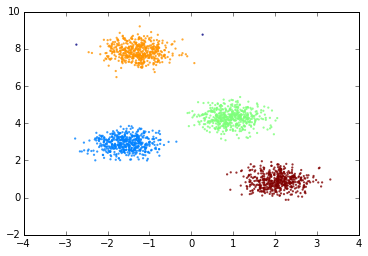

In [89]:
plt.scatter(dataset_2[:,0], dataset_2[:,1], c=lab2, alpha=0.8, s=5.0, lw = 0)

In [90]:
np.unique(lab2)

array([-1,  0,  1,  2,  3])